In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler


In [16]:
import yfinance as yf
import pandas as pd

# Download BTC historical data
btc = yf.download("BTC-USD", start="2020-01-01", end="2024-01-01", interval="1d")

# Save the data needed 
df = btc[['Close', 'Volume']].reset_index()

# Rename frame columns
df.rename(columns={'Close': 'Price', 'Volume': 'Volume'}, inplace=True)
print(df.info)
print(df.head())


C:\Users\JPabl\AppData\Local\Temp\ipykernel_21944\3544711086.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start="2020-01-01", end="2024-01-01", interval="1d")
[*********************100%***********************]  1 of 1 completed

<bound method DataFrame.info of Price        Date         Price       Volume
Ticker                  BTC-USD      BTC-USD
0      2020-01-01   7200.174316  18565664997
1      2020-01-02   6985.470215  20802083465
2      2020-01-03   7344.884277  28111481032
3      2020-01-04   7410.656738  18444271275
4      2020-01-05   7411.317383  19725074095
...           ...           ...          ...
1456   2023-12-27  43442.855469  25260941032
1457   2023-12-28  42627.855469  22992093014
1458   2023-12-29  42099.402344  26000021055
1459   2023-12-30  42156.902344  16013925945
1460   2023-12-31  42265.187500  16397498810

[1461 rows x 3 columns]>
Price        Date        Price       Volume
Ticker                 BTC-USD      BTC-USD
0      2020-01-01  7200.174316  18565664997
1      2020-01-02  6985.470215  20802083465
2      2020-01-03  7344.884277  28111481032
3      2020-01-04  7410.656738  18444271275
4      2020-01-05  7411.317383  19725074095


In [17]:
# standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[["Price","Volume"]])

# Verify scaled data
df_scaled[:5]


array([[-1.43559603, -0.72392736],
       [-1.44980646, -0.60440626],
       [-1.42601823, -0.2137695 ],
       [-1.42166501, -0.73041502],
       [-1.42162128, -0.66196496]])

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a model with 3 clusters 
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

print(df.head())


Price        Date        Price       Volume Cluster
Ticker                 BTC-USD      BTC-USD        
0      2020-01-01  7200.174316  18565664997       2
1      2020-01-02  6985.470215  20802083465       2
2      2020-01-03  7344.884277  28111481032       2
3      2020-01-04  7410.656738  18444271275       2
4      2020-01-05  7411.317383  19725074095       2


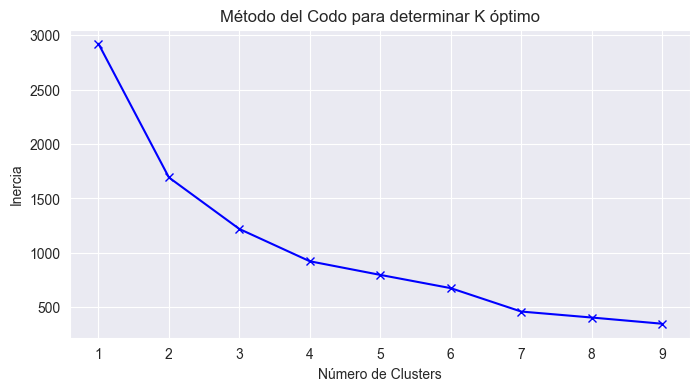

In [29]:
#Verify the correct number of clusters using the elbow method

inertia = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar K óptimo')
plt.show()

#We find out that our elbow is right on 3 clusters

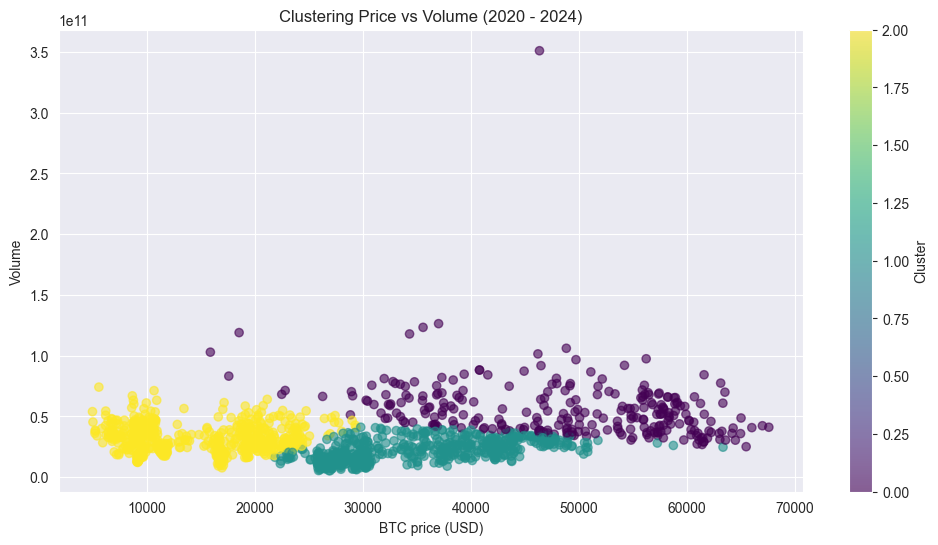

In [30]:
# Create a scatter plot to visualize the clustering of BTC price vs. volume
# Each point is colored according to its cluster assignment
plt.figure(figsize=(12, 6))
plt.scatter(df['Price'], df['Volume'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("BTC price (USD)")
plt.ylabel("Volume")
plt.title("Clustering Price vs Volume (2020 - 2024)")
plt.colorbar(label='Cluster')
plt.show()


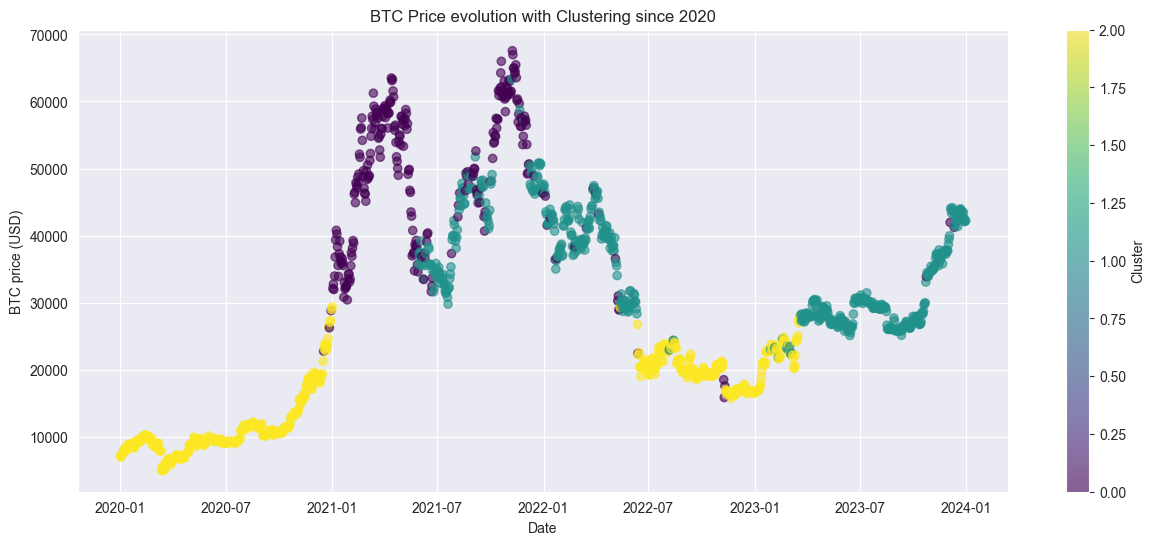

In [31]:

# Create a scatter plot to visualize BTC price evolution over time
# Points are colored according to their cluster assignment
plt.figure(figsize=(15,6))
plt.scatter(df['Date'], df['Price'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("Date")
plt.ylabel("BTC price (USD)")
plt.title("BTC Price evolution with Clustering since 2020")
plt.colorbar(label='Cluster')
plt.show()

## Analysis 
#### As we can see, our model captured the BTC price timeline well, grouping data into similar patterns such as bull runs, sideways movements, and bear markets. This shows that the model provides a meaningful response



In [33]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Price and Volume
Q1 = df[['Price','Volume']].quantile(0.25)
Q3 = df[['Price','Volume']].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Remove outliers: keep only rows where Price and Volume are within [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
df_no_outliers = df[~((df[['Price','Volume']] < (Q1 - 1.5 * IQR)) | 
                      (df[['Price','Volume']] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [100]:
# Apply logarithmic transformation to Price and Volume
df['Price_log'] = np.log(df['Price'])
df['Volume_log'] = np.log(df['Volume'] + 1)  # +1 avoids log(0)

df_no_outliers['Price_log'] = np.log(df_no_outliers['Price'])
df_no_outliers['Volume_log'] = np.log(df_no_outliers['Volume'] + 1)



C:\Users\JPabl\AppData\Local\Temp\ipykernel_21944\2787281598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Price_log'] = np.log(df_no_outliers['Price'])
C:\Users\JPabl\AppData\Local\Temp\ipykernel_21944\2787281598.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Volume_log'] = np.log(df_no_outliers['Volume'] + 1)


In [45]:

# Define the variables
X = df_no_outliers[['Price_log','Volume_log']]


# Adjust the model
kmeans = KMeans(n_clusters=3, random_state=42)
df_no_outliers['Cluster'] = kmeans.fit_predict(X)

C:\Users\JPabl\AppData\Local\Temp\ipykernel_21944\97999258.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Cluster'] = kmeans.fit_predict(X)


Text(0, 0.5, 'Volume')

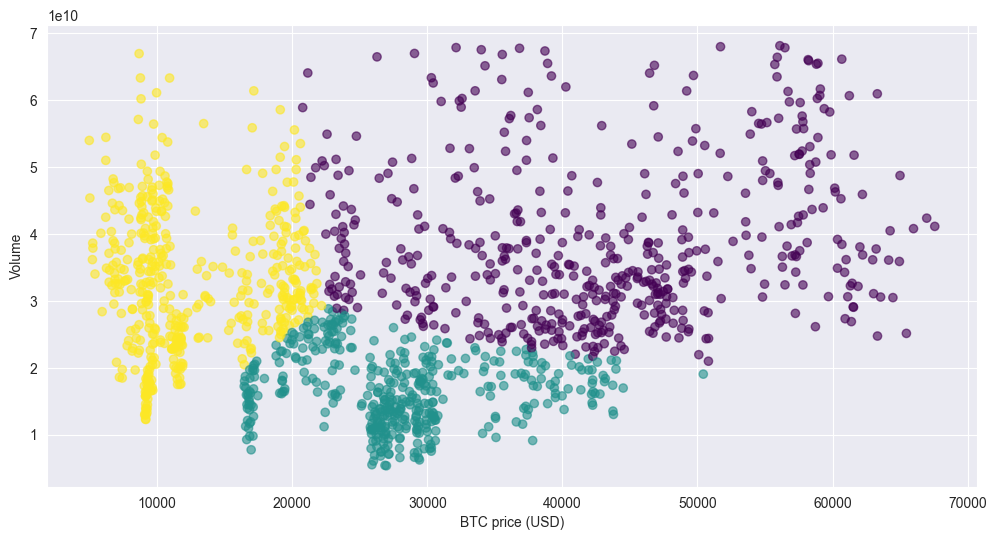

In [50]:
plt.figure(figsize=(12, 6))
plt.scatter(
    np.exp(df_no_outliers['Price_log']), ## Apply the exponential function to return to the original scale
    np.exp(df_no_outliers['Volume_log']), 
    c=df_no_outliers['Cluster'], 
    cmap='viridis', 
    alpha=0.6
)
plt.xlabel("BTC price (USD)")
plt.ylabel("Volume")



In [54]:
#Use DBSCAN with the raw data 
from sklearn.cluster import DBSCAN
#Create the model 
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters_dbscan_raw = dbscan.fit_predict(df_scaled)
df['Cluster_DBSCAN'] = clusters_dbscan_raw

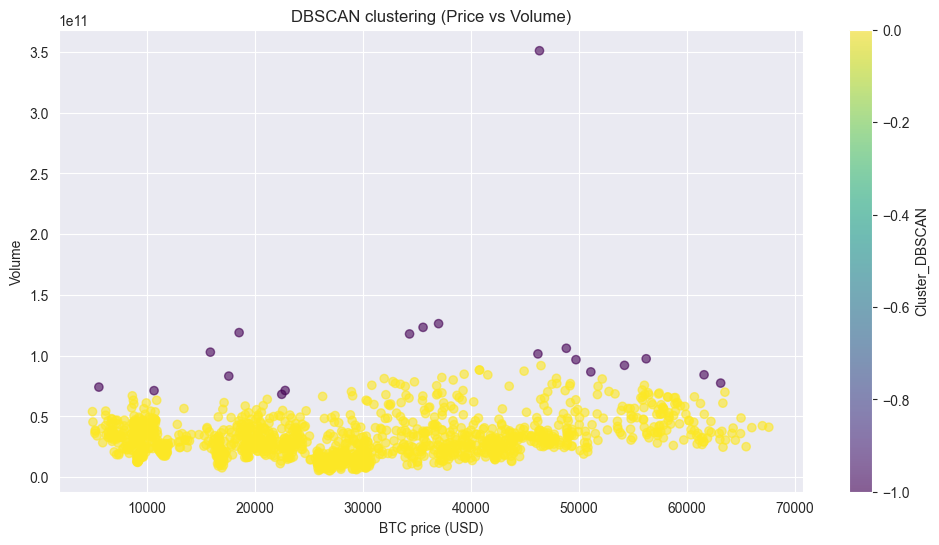

In [56]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Price'], df['Volume'], c=df['Cluster_DBSCAN'], cmap='viridis', alpha=0.6)
plt.xlabel("BTC price (USD)")
plt.ylabel("Volume")
plt.colorbar(label='Cluster_DBSCAN')
plt.title("DBSCAN clustering (Price vs Volume)")
plt.show()

#### This response is a clear prove of how good is DBSCAN to find out outliers

In [70]:
#DBSCAN without outliers 
dbscan_no_outliers = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan =  dbscan_no_outliers.fit_predict(X)
df_no_outliers["Cluster_DBSCAN"] = clusters_dbscan


C:\Users\JPabl\AppData\Local\Temp\ipykernel_21944\2331535284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["Cluster_DBSCAN"] = clusters_dbscan


Text(0, 0.5, 'Volume')

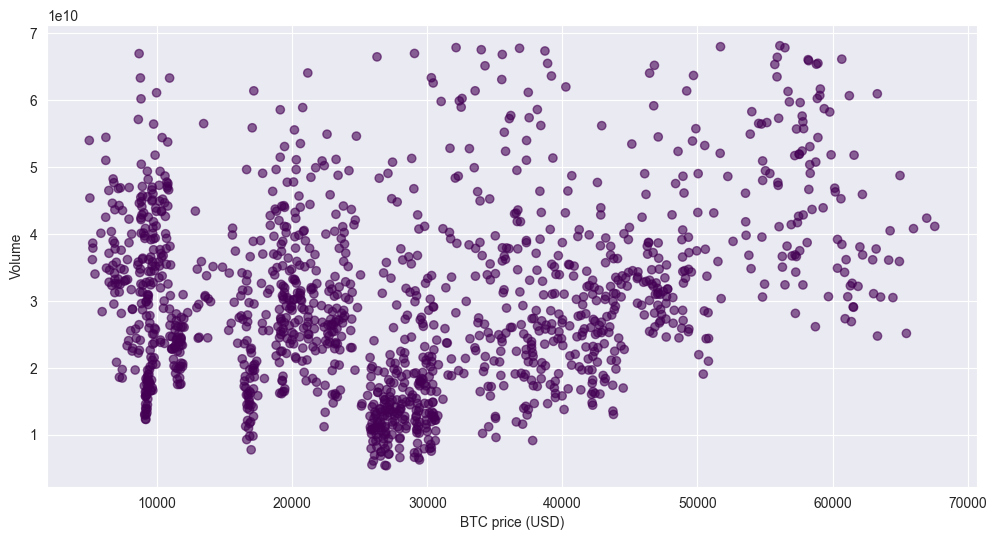

In [71]:
plt.figure(figsize=(12, 6))
plt.scatter(
    np.exp(df_no_outliers['Price_log']), 
    np.exp(df_no_outliers['Volume_log']), 
    c=df_no_outliers['Cluster_DBSCAN'], 
    cmap='viridis', 
    alpha=0.6
)
plt.xlabel("BTC price (USD)")
plt.ylabel("Volume")

In [99]:
for eps in [0.175, 0.5, 1, 2]:
    dbscan = DBSCAN(eps=eps, min_samples=20)
    labels = dbscan.fit_predict(X)
    print(f"eps={eps} → clusters encontrados:", len(set(labels)) - (1 if -1 in labels else 0))


eps=0.175 → clusters encontrados: 2
eps=0.5 → clusters encontrados: 1
eps=1 → clusters encontrados: 1
eps=2 → clusters encontrados: 1


In [96]:
dbscan = DBSCAN(eps=0.175, min_samples=20)
clusters_dbscan =  dbscan.fit_predict(X)
df_no_outliers["Cluster_DBSCAN"] = clusters_dbscan

C:\Users\JPabl\AppData\Local\Temp\ipykernel_21944\2062349468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["Cluster_DBSCAN"] = clusters_dbscan


Text(0, 0.5, 'Volume')

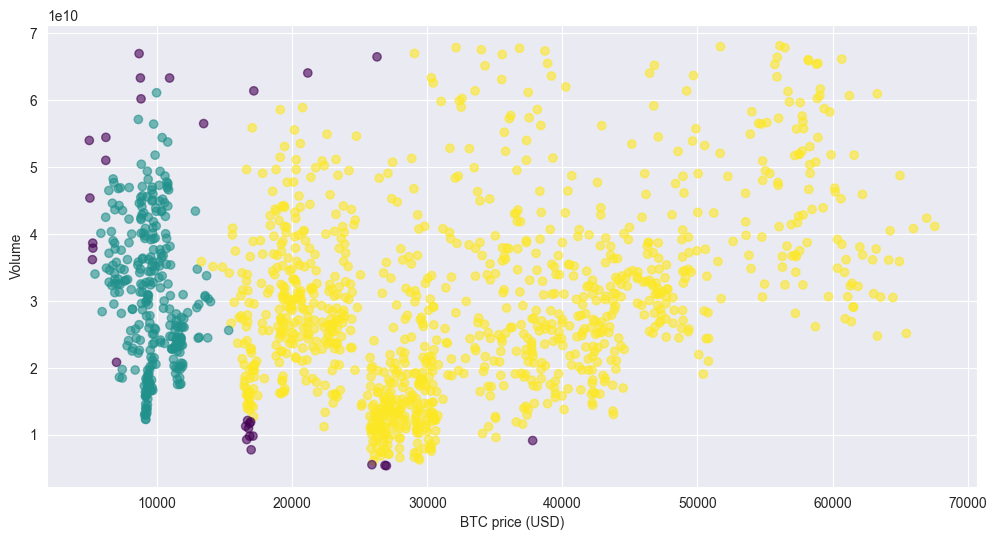

In [97]:
plt.figure(figsize=(12, 6))
plt.scatter(
    np.exp(df_no_outliers['Price_log']), 
    np.exp(df_no_outliers['Volume_log']), 
    c=df_no_outliers['Cluster_DBSCAN'], 
    cmap='viridis', 
    alpha=0.6
)
plt.xlabel("BTC price (USD)")
plt.ylabel("Volume")

#### We can tune DBSCAN by experimenting with key hyperparameters (e.g., eps and min_samples), possibly using a grid search approach.

In [95]:
from sklearn.metrics import silhouette_score
best_score = -1
best_params = None

for eps in np.linspace(0.001, 1, 1000):   # probar entre 0.2 y 2
    for min_s in [30,15,20]:
        model = DBSCAN(eps=eps, min_samples=min_s).fit(X)
        labels = model.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_params = (eps, min_s)

print("Best params:", best_params, "with silhouette =", best_score)

Mejores parámetros: (np.float64(0.17500000000000002), 20) con silhouette = 0.40181344292624765


This analysis shows that clustering techniques can provide meaningful insights into Bitcoin’s market behavior. K-Means was effective in identifying broad market phases (bull runs, sideways periods, and bear markets), while DBSCAN proved especially useful for detecting outliers and noise in the data, highlighting unusual trading days. The use of preprocessing steps such as outlier removal, standardization, and logarithmic transformation improved the quality of the clusters and made patterns more distinguishable.

Overall, the results suggest that a combination of clustering methods can give a more complete picture of cryptocurrency dynamics: K-Means for general structure, and DBSCAN for anomaly detection. Future work could involve adding more features (e.g., technical indicators, sentiment data) to enrich clustering and improve interpretability.